# Generator

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import pandas as pd
import time
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import (Dense, Flatten, Reshape,
                                     Conv2D, Conv2DTranspose, LeakyReLU, BatchNormalization, Input)
from tensorflow.keras.datasets import mnist

2024-06-28 06:49:20.851179: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-28 06:49:20.886953: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-28 06:49:21.387752: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
latent_space_size = 10

def get_random_input_vector(latent_space_size, batch_size=1):
    
    #Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1)
    
    random_vector = np.random.rand(batch_size, latent_space_size)
    
    return random_vector



In [3]:
def make_generator_model(latent_space_size):
    model = keras.Sequential()
    model.add(Input(shape=(latent_space_size,)))

    model.add(Dense(7 * 7 * 256, use_bias=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Reshape((7, 7, 256)))

    model.add(Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Conv2DTranspose(1, (5, 5), strides=(1, 1), padding='same', use_bias=False, activation='tanh'))

    return model



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12544)          │       125,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 12544)          │        50,176 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 7, 7, 128)      │       819,200 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 14, 14, 64)     │       204,800 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 28, 28, 32)     │        51,200 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 28, 28, 1)      │           800 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,252,512 (4.78 MB)

 Trainable params: 1,226,976 (4.68 MB)

 Non-trainable params: 25,536 (99.75 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


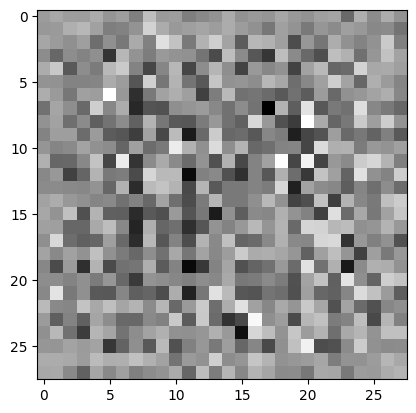

In [4]:
# Create generator model
generator = make_generator_model(latent_space_size)
generator.summary()

# Generate an image using the generator model
random_vector = get_random_input_vector(latent_space_size)
generated_image = generator.predict(random_vector)
plt.imshow(generated_image.reshape(28, 28), cmap='gray')
plt.show()

### Import Mnist dataset

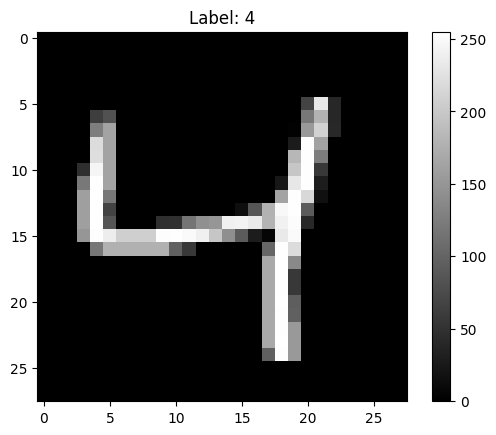

In [5]:
# Charger les données MNIST
digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
#digits = [0, 1]

mnist = fetch_openml('mnist_784', version=1)
X = mnist.data  # Utiliser un tout ensemble pour la rapidité
 
X = X.to_numpy()
y = mnist.target.astype(int)

mask = np.array([l in digits for l in y])
X = X[mask]
y = y[mask]

X = X[:4000]


# Check if X is a DataFrame and convert the first row to a numpy array for visualization
def visualize_image(loc, X, y):
    if isinstance(X, pd.DataFrame):
        image_matrix = X.iloc[loc].values.reshape(28, 28)
        y = y.to_numpy()
    else:
        image_matrix = X[loc].reshape(28, 28)

    # Visualize the image
    plt.imshow(image_matrix, cmap='gray')
    try:
        plt.title(f"Label: {y[loc]}")
    except:
        plt.title('Label: undifined')
    plt.colorbar()
    plt.show()


# Visualize the first image
visualize_image(2, X, y)

In [6]:
type(X)

numpy.ndarray

# Discriminator

In [7]:
def make_discriminator_model():
    model = keras.Sequential()
    model.add(Input(shape=(28, 28, 1)))

    model.add(Conv2D(64, (5, 5), strides=(2, 2), padding='same'))
    model.add(LeakyReLU())
    model.add(Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(LeakyReLU())
    model.add(Conv2D(256, (5, 5), strides=(2, 2), padding='same'))
    model.add(LeakyReLU())
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    return model


In [8]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)


In [9]:
ones = tf.ones((1, 1))
zeros = tf.zeros((1, 1))

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)


dis_loss = discriminator_loss(ones, zeros)
gen_loss = generator_loss(zeros)

print('dis_loss', dis_loss)
print('gen_loss', gen_loss)


dis_loss tf.Tensor(1.0064089, shape=(), dtype=float32)
gen_loss tf.Tensor(0.6931472, shape=(), dtype=float32)


In [10]:
generated_image = generator.predict(random_vector)
generated_image.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


(1, 28, 28, 1)

In [11]:
def create_batch_data(size=500, X=None, latent_space_size=latent_space_size):
    batch_real_images = X[:size]
    X = X[size:]
    random_vector = get_random_input_vector(latent_space_size, batch_size=size)
    batch_fake_images = generator.predict(random_vector)
    
    batch_real_images = batch_real_images.reshape(size, 28, 28, 1)

    print('batch_real_images', batch_real_images.shape)
    print('batch_fake_images', batch_fake_images.shape)
    
    batch_data = np.concatenate([batch_real_images, batch_fake_images])
    
    return batch_data, X



In [12]:
batch_data, remaining_data = create_batch_data(500, X, latent_space_size)
batch_data

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
batch_real_images (500, 28, 28, 1)
batch_fake_images (500, 28, 28, 1)


array([[[[ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         ...,
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00]],

        [[ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         ...,
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00]],

        [[ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         ...,
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00]],

        ...,

        [[ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         ...,
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00]],

        [[ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         ...,
         [ 0.00000000e+00],
         [ 0.00000000e+00],
         [ 0.00000000e+00]],

        [[ 0.00000000e+00],
         [ 0.00000000e+00],
         [

In [13]:
# Check the shape of the batch data
print(batch_data.shape)

(1000, 28, 28, 1)


In [14]:
batch_data[0].shape

(28, 28, 1)

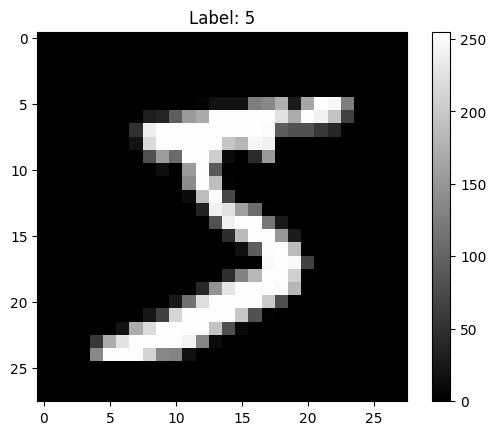

In [15]:
visualize_image(0, batch_data, y)

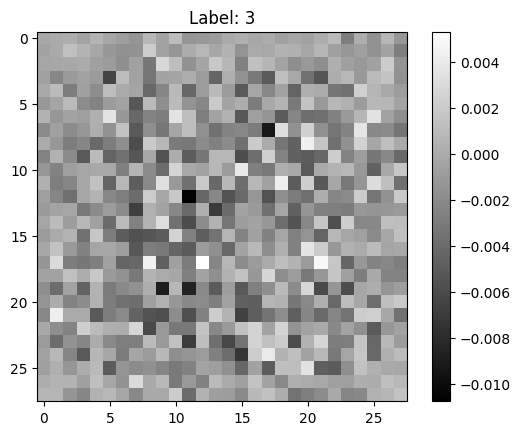

In [16]:
visualize_image(500, batch_data, y)


In [17]:
# Optimizers for the generator and discriminator
# Optimizers for the generator and discriminator
generator_optimizer = tf.keras.optimizers.Adam(1e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4, beta_1=0.5)


# Create the discriminator model
discriminator = make_discriminator_model()
discriminator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 14, 14, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 256)      │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,030,145 (3.93 MB)

 Trainable params: 1,030,145 (3.93 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Training step function
@tf.function
def train_step(real_images):
    noise = get_random_input_vector(latent_space_size, batch_size=real_images.shape[0])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(real_images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss

In [19]:
# Adjusted train function to include the save directory and save loss values
def train(dataset, epochs, save_dir, model_save_dir, loss_save_file):
    gen_losses = []
    disc_losses = []

    for epoch in range(epochs):
        for image_batch in dataset:
            gen_loss, disc_loss = train_step(image_batch)

        gen_losses.append(gen_loss)
        disc_losses.append(disc_loss)

        print(f'Epoch {epoch + 1}, Generator Loss: {gen_loss}, Discriminator Loss: {disc_loss}')

        if (epoch + 1) % 10 == 0:
            generate_and_save_images(generator, epoch + 1, get_random_input_vector(latent_space_size), save_dir)
            generator.save(os.path.join(model_save_dir, 'generator_epoch_{:04d}'.format(epoch + 1) + 
                                        'latent_space_size' + str(latent_space_size) + '.h5'))
            discriminator.save(os.path.join(model_save_dir, 'discriminator_epoch_{:04d}.h5'.format(epoch + 1)+ 
                                            'latent_space_size' + str(latent_space_size) + '.h5'))

    generate_and_save_images(generator, epochs, get_random_input_vector(latent_space_size), save_dir)

    # Save the loss values
    np.savez(loss_save_file, gen_losses=gen_losses, disc_losses=disc_losses)


In [20]:
# Helper function to generate and save images in a specific directory
def generate_and_save_images(model, epoch, test_input, save_dir):
    predictions = model(test_input, training=False)

    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
        
    plt.savefig(os.path.join(save_dir, 'image_at_epoch_{:04d}.png'.format(epoch)))
    plt.show()

In [21]:
# Prepare the dataset
def prepare_dataset(X, batch_size):
    X = X / 255.0  # Normalize the images to [0, 1]
    X = X.reshape(-1, 28, 28, 1).astype('float32')
    dataset = tf.data.Dataset.from_tensor_slices(X).shuffle(60000).batch(batch_size, drop_remainder=True)
    return dataset

/home/duincan/miniconda3/envs/Unsupervised/lib/python3.11/site-packages/keras/src/backend/tensorflow/nn.py:681: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2024-06-28 06:49:25.982763: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'gradient_tape/sequential_1_2/leaky_re_lu_6_1/LeakyRelu/LeakyReluGrad' exist for missing node 'sequential_1_2/conv2d_2_1/add'.
2024-06-28 06:49:30.226972: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 1, Generator Loss: 0.7865642309188843, Discriminator Loss: 1.2294398546218872


2024-06-28 06:49:34.469448: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 2, Generator Loss: 1.307414174079895, Discriminator Loss: 1.0415122509002686


2024-06-28 06:49:38.642976: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 3, Generator Loss: 1.0601069927215576, Discriminator Loss: 1.1315336227416992


2024-06-28 06:49:42.801960: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 4, Generator Loss: 0.8599357008934021, Discriminator Loss: 1.171614170074463


2024-06-28 06:49:46.955333: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 5, Generator Loss: 0.9872016310691833, Discriminator Loss: 1.0876327753067017


2024-06-28 06:49:51.134979: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 6, Generator Loss: 0.9074973464012146, Discriminator Loss: 1.0916364192962646


2024-06-28 06:49:55.273505: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 7, Generator Loss: 0.6892860531806946, Discriminator Loss: 1.0570664405822754


2024-06-28 06:49:59.426783: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 8, Generator Loss: 1.0588421821594238, Discriminator Loss: 0.9064480662345886


2024-06-28 06:50:03.572899: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 9, Generator Loss: 0.82322758436203, Discriminator Loss: 0.98002028465271
Epoch 10, Generator Loss: 1.3718252182006836, Discriminator Loss: 0.9941297173500061


2024-06-28 06:50:07.675566: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


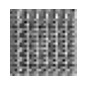

2024-06-28 06:50:11.857210: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 11, Generator Loss: 1.1604881286621094, Discriminator Loss: 0.9308355450630188


2024-06-28 06:50:15.963831: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 12, Generator Loss: 0.6063196063041687, Discriminator Loss: 1.0206104516983032


2024-06-28 06:50:20.108912: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 13, Generator Loss: 0.9597872495651245, Discriminator Loss: 0.7282241582870483


2024-06-28 06:50:24.228769: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 14, Generator Loss: 0.5265790224075317, Discriminator Loss: 1.0197224617004395


2024-06-28 06:50:28.381031: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 15, Generator Loss: 0.6079955101013184, Discriminator Loss: 1.003306269645691


2024-06-28 06:50:32.513906: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 16, Generator Loss: 0.6247545480728149, Discriminator Loss: 0.9507824182510376


2024-06-28 06:50:36.645018: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 17, Generator Loss: 0.6428611278533936, Discriminator Loss: 0.9361534118652344


2024-06-28 06:50:40.797933: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 18, Generator Loss: 1.5499130487442017, Discriminator Loss: 0.5832522511482239


2024-06-28 06:50:44.910669: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 19, Generator Loss: 0.979203462600708, Discriminator Loss: 0.8484271168708801
Epoch 20, Generator Loss: 2.1048054695129395, Discriminator Loss: 0.790799617767334


2024-06-28 06:50:49.066468: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


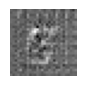

2024-06-28 06:50:53.288018: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 21, Generator Loss: 1.116262435913086, Discriminator Loss: 0.67496258020401


2024-06-28 06:50:57.398474: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 22, Generator Loss: 1.3914822340011597, Discriminator Loss: 0.6009398698806763


2024-06-28 06:51:01.644614: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 23, Generator Loss: 1.734481930732727, Discriminator Loss: 0.46561145782470703


2024-06-28 06:51:05.844844: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 24, Generator Loss: 1.4792110919952393, Discriminator Loss: 0.6748186945915222


2024-06-28 06:51:09.987517: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 25, Generator Loss: 1.1214803457260132, Discriminator Loss: 0.5956275463104248


2024-06-28 06:51:14.090434: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 26, Generator Loss: 2.134648084640503, Discriminator Loss: 0.7034534215927124


2024-06-28 06:51:18.246665: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 27, Generator Loss: 0.5377688407897949, Discriminator Loss: 0.9758145213127136


2024-06-28 06:51:22.408078: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 28, Generator Loss: 0.7421339750289917, Discriminator Loss: 0.79255610704422


2024-06-28 06:51:26.515762: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 29, Generator Loss: 0.6723856925964355, Discriminator Loss: 0.8349525928497314
Epoch 30, Generator Loss: 0.7470932006835938, Discriminator Loss: 0.7754772305488586


2024-06-28 06:51:30.684635: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


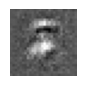

2024-06-28 06:51:35.044185: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 31, Generator Loss: 0.7034618258476257, Discriminator Loss: 0.7836522459983826


2024-06-28 06:51:39.163395: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 32, Generator Loss: 0.6534922122955322, Discriminator Loss: 0.8562279939651489


2024-06-28 06:51:43.271338: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 33, Generator Loss: 0.7955518364906311, Discriminator Loss: 0.7350354790687561


2024-06-28 06:51:47.403215: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 34, Generator Loss: 0.752869188785553, Discriminator Loss: 0.7674975395202637


2024-06-28 06:51:51.558499: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 35, Generator Loss: 0.9262460470199585, Discriminator Loss: 0.6482177972793579


2024-06-28 06:51:55.687360: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 36, Generator Loss: 0.7083033323287964, Discriminator Loss: 0.7780597805976868


2024-06-28 06:51:59.824063: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 37, Generator Loss: 0.6969822645187378, Discriminator Loss: 0.7983444929122925


2024-06-28 06:52:03.973792: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 38, Generator Loss: 0.7948718070983887, Discriminator Loss: 0.7283048629760742


2024-06-28 06:52:08.097876: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 39, Generator Loss: 0.7586923837661743, Discriminator Loss: 0.7513244152069092
Epoch 40, Generator Loss: 0.7591164708137512, Discriminator Loss: 0.7429949045181274


2024-06-28 06:52:12.272621: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


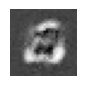

2024-06-28 06:52:16.458190: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 41, Generator Loss: 0.7691680192947388, Discriminator Loss: 0.734619677066803


2024-06-28 06:52:20.617914: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 42, Generator Loss: 0.8080816864967346, Discriminator Loss: 0.7128891348838806


2024-06-28 06:52:24.762044: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 43, Generator Loss: 0.6952418088912964, Discriminator Loss: 0.791191041469574


2024-06-28 06:52:28.894187: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 44, Generator Loss: 0.79279625415802, Discriminator Loss: 0.709801435470581


2024-06-28 06:52:33.046940: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 45, Generator Loss: 0.8930855393409729, Discriminator Loss: 0.648073673248291


2024-06-28 06:52:37.147750: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 46, Generator Loss: 0.9828991889953613, Discriminator Loss: 0.6056169271469116


2024-06-28 06:52:41.344704: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 47, Generator Loss: 0.8362627625465393, Discriminator Loss: 0.6857163310050964


2024-06-28 06:52:45.517507: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 48, Generator Loss: 0.7332794070243835, Discriminator Loss: 0.7480588555335999


2024-06-28 06:52:49.676877: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 49, Generator Loss: 1.0053045749664307, Discriminator Loss: 0.5854237079620361
Epoch 50, Generator Loss: 0.7050320506095886, Discriminator Loss: 0.7760862708091736


2024-06-28 06:52:53.846817: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


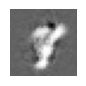

2024-06-28 06:52:58.066951: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 51, Generator Loss: 0.8191404938697815, Discriminator Loss: 0.6974385976791382


2024-06-28 06:53:02.196072: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 52, Generator Loss: 0.9260969758033752, Discriminator Loss: 0.6383230686187744


2024-06-28 06:53:06.358810: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 53, Generator Loss: 0.7381695508956909, Discriminator Loss: 0.7492305040359497


2024-06-28 06:53:10.559242: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 54, Generator Loss: 0.7654320597648621, Discriminator Loss: 0.731446385383606


2024-06-28 06:53:15.174276: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 55, Generator Loss: 0.8420735597610474, Discriminator Loss: 0.6690757274627686


2024-06-28 06:53:19.386557: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 56, Generator Loss: 0.8603254556655884, Discriminator Loss: 0.6696199178695679


2024-06-28 06:53:23.555629: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 57, Generator Loss: 0.8702932000160217, Discriminator Loss: 0.6640391945838928


2024-06-28 06:53:27.794248: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 58, Generator Loss: 0.9624621272087097, Discriminator Loss: 0.6129913926124573


2024-06-28 06:53:32.170531: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 59, Generator Loss: 0.8935596942901611, Discriminator Loss: 0.6467244029045105
Epoch 60, Generator Loss: 0.9377325773239136, Discriminator Loss: 0.6067402958869934


2024-06-28 06:53:36.301915: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


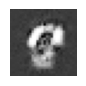

2024-06-28 06:53:40.484398: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 61, Generator Loss: 0.763814389705658, Discriminator Loss: 0.7324401140213013


2024-06-28 06:53:44.821825: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 62, Generator Loss: 0.7205175161361694, Discriminator Loss: 0.755763828754425


2024-06-28 06:53:48.935971: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 63, Generator Loss: 0.8515721559524536, Discriminator Loss: 0.6660532355308533


2024-06-28 06:53:53.066331: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 64, Generator Loss: 0.8235895037651062, Discriminator Loss: 0.689507007598877


2024-06-28 06:53:57.200662: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 65, Generator Loss: 0.9115967750549316, Discriminator Loss: 0.6387422680854797


2024-06-28 06:54:01.351242: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 66, Generator Loss: 0.9118952751159668, Discriminator Loss: 0.627153217792511


2024-06-28 06:54:05.523664: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 67, Generator Loss: 0.823215901851654, Discriminator Loss: 0.682350218296051


2024-06-28 06:54:09.666944: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 68, Generator Loss: 0.8862417936325073, Discriminator Loss: 0.6224439144134521


2024-06-28 06:54:13.791443: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 69, Generator Loss: 0.6654829382896423, Discriminator Loss: 0.81452476978302
Epoch 70, Generator Loss: 0.9941306114196777, Discriminator Loss: 0.5700690746307373


2024-06-28 06:54:17.916014: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


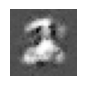

2024-06-28 06:54:22.147354: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 71, Generator Loss: 0.8526053428649902, Discriminator Loss: 0.6600899696350098


2024-06-28 06:54:26.688531: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 72, Generator Loss: 0.9443738460540771, Discriminator Loss: 0.6196913719177246


2024-06-28 06:54:30.971337: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 73, Generator Loss: 1.2774351835250854, Discriminator Loss: 0.4771592319011688


2024-06-28 06:54:35.077512: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 74, Generator Loss: 0.7682613134384155, Discriminator Loss: 0.7322746515274048


2024-06-28 06:54:39.187632: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 75, Generator Loss: 0.9650995135307312, Discriminator Loss: 0.5767583847045898


2024-06-28 06:54:43.309844: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 76, Generator Loss: 1.0626697540283203, Discriminator Loss: 0.529930591583252


2024-06-28 06:54:47.463815: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 77, Generator Loss: 0.7589093446731567, Discriminator Loss: 0.7377398610115051


2024-06-28 06:54:51.651452: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 78, Generator Loss: 0.7021148800849915, Discriminator Loss: 0.7855361700057983


2024-06-28 06:54:55.794380: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 79, Generator Loss: 0.734484851360321, Discriminator Loss: 0.7673678398132324
Epoch 80, Generator Loss: 0.9397664070129395, Discriminator Loss: 0.6085341572761536


2024-06-28 06:54:59.931861: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


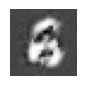

2024-06-28 06:55:04.142038: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 81, Generator Loss: 0.8428274393081665, Discriminator Loss: 0.6718494892120361


2024-06-28 06:55:08.297024: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 82, Generator Loss: 1.186105489730835, Discriminator Loss: 0.491566926240921


2024-06-28 06:55:12.414712: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 83, Generator Loss: 1.5944805145263672, Discriminator Loss: 0.37565845251083374


2024-06-28 06:55:16.549623: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 84, Generator Loss: 1.9511513710021973, Discriminator Loss: 0.2758845090866089


2024-06-28 06:55:20.686745: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 85, Generator Loss: 1.9841103553771973, Discriminator Loss: 0.24713674187660217


2024-06-28 06:55:24.842682: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 86, Generator Loss: 3.1604390144348145, Discriminator Loss: 0.34883615374565125


2024-06-28 06:55:29.063671: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 87, Generator Loss: 2.67248797416687, Discriminator Loss: 0.2415086030960083


2024-06-28 06:55:33.257542: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 88, Generator Loss: 2.5134694576263428, Discriminator Loss: 0.2897164821624756


2024-06-28 06:55:37.430905: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 89, Generator Loss: 2.8782083988189697, Discriminator Loss: 0.26915714144706726
Epoch 90, Generator Loss: 2.7241034507751465, Discriminator Loss: 0.31646594405174255


2024-06-28 06:55:41.585991: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


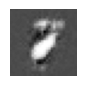

2024-06-28 06:55:45.804303: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 91, Generator Loss: 2.6138672828674316, Discriminator Loss: 0.3142279386520386


2024-06-28 06:55:50.201266: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 92, Generator Loss: 2.3609955310821533, Discriminator Loss: 0.26453182101249695


2024-06-28 06:55:54.484510: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 93, Generator Loss: 2.1673743724823, Discriminator Loss: 0.26812949776649475


2024-06-28 06:55:58.794008: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 94, Generator Loss: 2.5339112281799316, Discriminator Loss: 0.3213539123535156


2024-06-28 06:56:03.132262: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 95, Generator Loss: 2.5574045181274414, Discriminator Loss: 0.27229976654052734


2024-06-28 06:56:07.257172: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 96, Generator Loss: 2.4085798263549805, Discriminator Loss: 0.29511696100234985


2024-06-28 06:56:11.391853: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 97, Generator Loss: 2.5945701599121094, Discriminator Loss: 0.29253441095352173


2024-06-28 06:56:15.509361: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 98, Generator Loss: 2.3785390853881836, Discriminator Loss: 0.276777982711792


2024-06-28 06:56:19.672771: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 99, Generator Loss: 2.143592119216919, Discriminator Loss: 0.2879202961921692
Epoch 100, Generator Loss: 2.83742094039917, Discriminator Loss: 0.24244877696037292


2024-06-28 06:56:23.867400: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


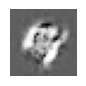

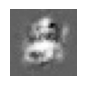

In [22]:
# Prepare the MNIST dataset
batch_size = 256
mnist_dataset = prepare_dataset(X, batch_size)

# Train the GAN
epochs = 100

# Define the directory where images will be saved
save_directory = 'training_images_CNN_' + str(epochs) + '_epochs_time_' + str(int(time.time()))

model_save_directory = 'saved_models_CNN'
loss_save_file = 'training_losses_CNN.npz'

# Create the directories if they don't exist
if not os.path.exists(model_save_directory):
    os.makedirs(model_save_directory)
    


train(mnist_dataset, epochs, save_directory, model_save_directory, loss_save_file)


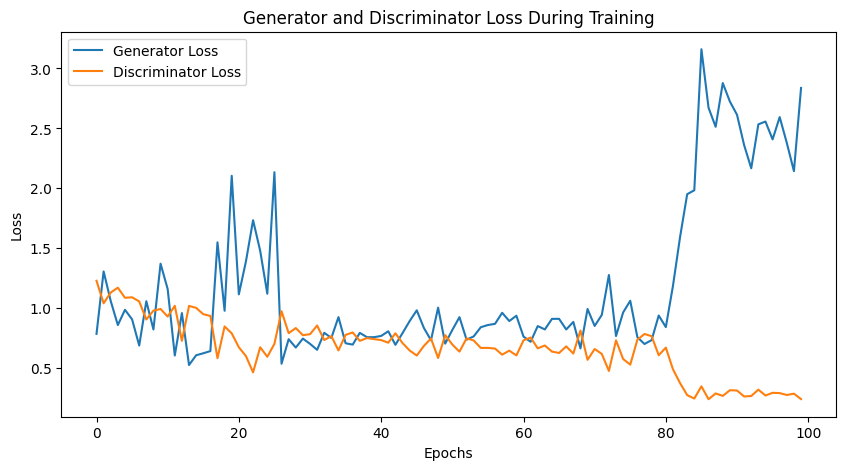

In [23]:
# Function to load and plot the losses
def plot_losses(loss_file):
    data = np.load(loss_file)
    gen_losses = data['gen_losses']
    disc_losses = data['disc_losses']

    plt.figure(figsize=(10, 5))
    plt.plot(gen_losses, label='Generator Loss')
    plt.plot(disc_losses, label='Discriminator Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Generator and Discriminator Loss During Training')
    plt.show()

# Plot the losses after training
plot_losses(loss_save_file)

In [24]:
# Function to generate and display images using the trained generator model
def generate_images(generator_model, num_images, latent_space_size):
    random_vectors = get_random_input_vector(latent_space_size, batch_size=num_images)
    generated_images = generator_model(random_vectors, training=False)

    fig = plt.figure(figsize=(10, 10))

    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(generated_images[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    plt.show()

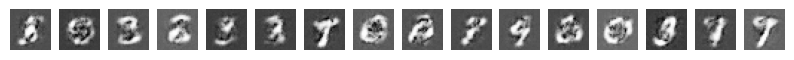

In [30]:
num_images_to_generate = 16

latent_space_size = 10

generator = keras.models.load_model('saved_models_CNN/generator_epoch_0100latent_space_size10.h5')


generate_images(generator, num_images_to_generate, latent_space_size)


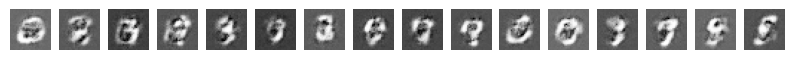

In [31]:
# Load the trained generator model
generator = keras.models.load_model('saved_models_CNN/generator_epoch_0060latent_space_size10.h5')

# Generate and display images
num_images_to_generate = 16
latent_space_size = 10  # Define the latent space size used during training
generate_images(generator, num_images_to_generate, latent_space_size)

In [33]:
latent_space_size = 2

# Optimizers for the generator and discriminator
# Optimizers for the generator and discriminator
generator_optimizer = tf.keras.optimizers.Adam(1e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4, beta_1=0.5)

# Create the discriminator model
discriminator = make_discriminator_model()
discriminator.summary()

# Create the generator model with the new latent space size
generator = make_generator_model(latent_space_size)
generator.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_14 (LeakyReLU)      │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 7, 7, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_15 (LeakyReLU)      │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 256)      │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_16 (LeakyReLU)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,030,145 (3.93 MB)

 Trainable params: 1,030,145 (3.93 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 12544)          │        25,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 12544)          │        50,176 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_17 (LeakyReLU)      │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_8              │ (None, 7, 7, 128)      │       819,200 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_18 (LeakyReLU)      │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_9              │ (None, 14, 14, 64)     │       204,800 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_19 (LeakyReLU)      │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_10             │ (None, 28, 28, 32)     │        51,200 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_20 (LeakyReLU)      │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_11             │ (None, 28, 28, 1)      │           800 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,152,160 (4.40 MB)

 Trainable params: 1,126,624 (4.30 MB)

 Non-trainable params: 25,536 (99.75 KB)

2024-06-28 07:07:44.324545: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 1, Generator Loss: 2.571322441101074, Discriminator Loss: 0.22871005535125732


2024-06-28 07:07:48.599399: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 2, Generator Loss: 3.3745851516723633, Discriminator Loss: 0.250840961933136


2024-06-28 07:07:52.814883: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 3, Generator Loss: 2.014145612716675, Discriminator Loss: 0.2398720681667328


2024-06-28 07:07:57.021028: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 4, Generator Loss: 2.2954659461975098, Discriminator Loss: 0.25725504755973816


2024-06-28 07:08:01.171090: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 5, Generator Loss: 2.130740165710449, Discriminator Loss: 0.23174318671226501


2024-06-28 07:08:05.326013: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 6, Generator Loss: 2.082848072052002, Discriminator Loss: 0.24173954129219055


2024-06-28 07:08:09.487159: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 7, Generator Loss: 0.7567136287689209, Discriminator Loss: 0.747047483921051


2024-06-28 07:08:13.643623: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 8, Generator Loss: 0.4368647038936615, Discriminator Loss: 1.2115504741668701


2024-06-28 07:08:17.812199: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 9, Generator Loss: 0.9194636940956116, Discriminator Loss: 0.625396728515625
Epoch 10, Generator Loss: 0.7601909637451172, Discriminator Loss: 0.7639452219009399


2024-06-28 07:08:21.969933: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


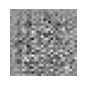

2024-06-28 07:08:25.286076: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 11, Generator Loss: 0.7292987108230591, Discriminator Loss: 0.7707782983779907


2024-06-28 07:08:28.504611: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 12, Generator Loss: 0.923324704170227, Discriminator Loss: 0.6165516972541809


2024-06-28 07:08:31.735293: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 13, Generator Loss: 0.9503495693206787, Discriminator Loss: 0.6184945702552795


2024-06-28 07:08:35.818619: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 14, Generator Loss: 0.8826225996017456, Discriminator Loss: 0.6426030397415161


2024-06-28 07:08:42.879553: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 15, Generator Loss: 1.545798659324646, Discriminator Loss: 0.34721243381500244


2024-06-28 07:08:49.937972: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 16, Generator Loss: 1.8466417789459229, Discriminator Loss: 0.2805163860321045


2024-06-28 07:08:57.012112: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 17, Generator Loss: 2.5578742027282715, Discriminator Loss: 0.22370114922523499


2024-06-28 07:09:04.098071: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 18, Generator Loss: 2.7280426025390625, Discriminator Loss: 0.22364726662635803


2024-06-28 07:09:11.290651: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 19, Generator Loss: 2.215137481689453, Discriminator Loss: 0.2397817224264145
Epoch 20, Generator Loss: 5.95282506942749, Discriminator Loss: 1.6156198978424072


2024-06-28 07:09:18.351025: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


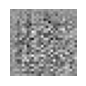

2024-06-28 07:09:25.548999: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 21, Generator Loss: 3.8823659420013428, Discriminator Loss: 0.49657511711120605


2024-06-28 07:09:32.693761: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 22, Generator Loss: 4.09268856048584, Discriminator Loss: 0.6647026538848877


2024-06-28 07:09:39.768024: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 23, Generator Loss: 3.651186227798462, Discriminator Loss: 0.4042540192604065


2024-06-28 07:09:46.790427: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 24, Generator Loss: 3.951714515686035, Discriminator Loss: 0.4987271726131439


2024-06-28 07:09:53.879283: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 25, Generator Loss: 3.4135279655456543, Discriminator Loss: 0.4892646074295044


2024-06-28 07:10:00.933019: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 26, Generator Loss: 2.887709140777588, Discriminator Loss: 0.26862552762031555


2024-06-28 07:10:08.001078: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 27, Generator Loss: 2.912525177001953, Discriminator Loss: 0.2868700623512268


2024-06-28 07:10:15.062321: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 28, Generator Loss: 2.3634064197540283, Discriminator Loss: 0.25628453493118286


2024-06-28 07:10:22.097097: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 29, Generator Loss: 2.860459804534912, Discriminator Loss: 0.2332257479429245
Epoch 30, Generator Loss: 2.5233612060546875, Discriminator Loss: 0.2080579698085785


2024-06-28 07:10:29.172250: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


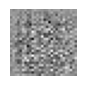

2024-06-28 07:10:36.371794: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 31, Generator Loss: 1.4791741371154785, Discriminator Loss: 0.3729472756385803


2024-06-28 07:10:43.406479: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 32, Generator Loss: 2.4648609161376953, Discriminator Loss: 0.24419362843036652


2024-06-28 07:10:50.580826: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 33, Generator Loss: 2.5318493843078613, Discriminator Loss: 0.22292380034923553


2024-06-28 07:10:57.724370: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 34, Generator Loss: 3.7563135623931885, Discriminator Loss: 0.5762583017349243


2024-06-28 07:11:04.851496: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 35, Generator Loss: 3.734772205352783, Discriminator Loss: 0.5026701092720032


2024-06-28 07:11:11.936556: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 36, Generator Loss: 2.262578010559082, Discriminator Loss: 0.22515350580215454


2024-06-28 07:11:19.005948: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 37, Generator Loss: 7.062548637390137, Discriminator Loss: 2.460419178009033


2024-06-28 07:11:26.123415: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 38, Generator Loss: 4.791794300079346, Discriminator Loss: 0.8805413842201233


2024-06-28 07:11:33.195705: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 39, Generator Loss: 4.165454864501953, Discriminator Loss: 0.6346818208694458
Epoch 40, Generator Loss: 4.007686138153076, Discriminator Loss: 0.5061083436012268


2024-06-28 07:11:40.315220: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


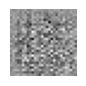

2024-06-28 07:11:47.497714: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 41, Generator Loss: 4.03759765625, Discriminator Loss: 0.6030481457710266


2024-06-28 07:11:54.644802: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 42, Generator Loss: 3.6106958389282227, Discriminator Loss: 0.4175177216529846


2024-06-28 07:12:01.758462: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 43, Generator Loss: 3.1773147583007812, Discriminator Loss: 0.2758535146713257


2024-06-28 07:12:08.906674: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 44, Generator Loss: 3.761096477508545, Discriminator Loss: 0.35569852590560913


2024-06-28 07:12:16.011941: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 45, Generator Loss: 2.8796334266662598, Discriminator Loss: 0.3382122218608856


2024-06-28 07:12:23.149680: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 46, Generator Loss: 2.911633253097534, Discriminator Loss: 0.2431895136833191


2024-06-28 07:12:30.236320: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 47, Generator Loss: 2.0213589668273926, Discriminator Loss: 0.25204184651374817


2024-06-28 07:12:37.373281: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 48, Generator Loss: 1.9175355434417725, Discriminator Loss: 0.2827615737915039


2024-06-28 07:12:44.477465: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 49, Generator Loss: 2.6760306358337402, Discriminator Loss: 0.2902098000049591
Epoch 50, Generator Loss: 2.9049556255340576, Discriminator Loss: 0.19865329563617706


2024-06-28 07:12:51.503024: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


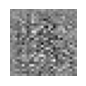

2024-06-28 07:12:58.720239: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 51, Generator Loss: 2.3452346324920654, Discriminator Loss: 0.21309420466423035


2024-06-28 07:13:05.815207: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 52, Generator Loss: 2.158374309539795, Discriminator Loss: 0.2815154194831848


2024-06-28 07:13:12.934817: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 53, Generator Loss: 2.433358907699585, Discriminator Loss: 0.19856876134872437


2024-06-28 07:13:19.935849: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 54, Generator Loss: 1.3699175119400024, Discriminator Loss: 0.40190744400024414


2024-06-28 07:13:26.978917: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 55, Generator Loss: 0.5399501919746399, Discriminator Loss: 1.0681027173995972


2024-06-28 07:13:34.005759: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 56, Generator Loss: 0.6678124666213989, Discriminator Loss: 0.8279260993003845


2024-06-28 07:13:41.133661: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 57, Generator Loss: 0.9291855096817017, Discriminator Loss: 0.6204595565795898


2024-06-28 07:13:48.096909: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 58, Generator Loss: 0.800753653049469, Discriminator Loss: 0.6998121738433838


2024-06-28 07:13:55.126282: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 59, Generator Loss: 1.10697340965271, Discriminator Loss: 0.5165077447891235
Epoch 60, Generator Loss: 1.085451364517212, Discriminator Loss: 0.5245652198791504


2024-06-28 07:14:02.127807: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


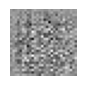

2024-06-28 07:14:09.272512: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 61, Generator Loss: 1.3527154922485352, Discriminator Loss: 0.41065165400505066


2024-06-28 07:14:16.273622: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 62, Generator Loss: 1.5363879203796387, Discriminator Loss: 0.3500615358352661


2024-06-28 07:14:23.372123: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 63, Generator Loss: 1.8040192127227783, Discriminator Loss: 0.28637635707855225


2024-06-28 07:14:30.489849: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 64, Generator Loss: 2.5393948554992676, Discriminator Loss: 0.2105838656425476


2024-06-28 07:14:37.579006: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 65, Generator Loss: 2.553112268447876, Discriminator Loss: 0.2580934166908264


2024-06-28 07:14:44.698628: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 66, Generator Loss: 3.0808348655700684, Discriminator Loss: 0.26678144931793213


2024-06-28 07:14:51.833606: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 67, Generator Loss: 2.161655902862549, Discriminator Loss: 0.21389982104301453


2024-06-28 07:14:58.978468: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 68, Generator Loss: 1.974968671798706, Discriminator Loss: 0.25517886877059937


2024-06-28 07:15:06.075881: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 69, Generator Loss: 1.6730868816375732, Discriminator Loss: 0.2912365794181824
Epoch 70, Generator Loss: 1.8262124061584473, Discriminator Loss: 0.2861246168613434


2024-06-28 07:15:13.219650: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


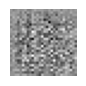

2024-06-28 07:15:20.415013: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 71, Generator Loss: 2.984226942062378, Discriminator Loss: 0.21419298648834229


2024-06-28 07:15:27.514057: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 72, Generator Loss: 2.9381861686706543, Discriminator Loss: 0.20474430918693542


2024-06-28 07:15:34.556441: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 73, Generator Loss: 5.255971908569336, Discriminator Loss: 1.100521445274353


2024-06-28 07:15:41.638981: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 74, Generator Loss: 4.192835330963135, Discriminator Loss: 0.7182084321975708


2024-06-28 07:15:48.659945: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 75, Generator Loss: 3.9885549545288086, Discriminator Loss: 0.47915029525756836


2024-06-28 07:15:55.666821: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 76, Generator Loss: 4.174315452575684, Discriminator Loss: 0.709666907787323


2024-06-28 07:16:02.737125: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 77, Generator Loss: 3.6969141960144043, Discriminator Loss: 0.489037424325943


2024-06-28 07:16:09.865998: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 78, Generator Loss: 3.286990165710449, Discriminator Loss: 0.28427356481552124


2024-06-28 07:16:16.993139: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 79, Generator Loss: 3.7620906829833984, Discriminator Loss: 0.5253957509994507
Epoch 80, Generator Loss: 3.3631350994110107, Discriminator Loss: 0.33201274275779724


2024-06-28 07:16:24.152792: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


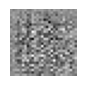

2024-06-28 07:16:31.391307: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 81, Generator Loss: 3.289963722229004, Discriminator Loss: 0.28768664598464966


2024-06-28 07:16:38.476515: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 82, Generator Loss: 2.682032585144043, Discriminator Loss: 0.2883276045322418


2024-06-28 07:16:45.568338: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 83, Generator Loss: 2.1367251873016357, Discriminator Loss: 0.24023301899433136


2024-06-28 07:16:52.637655: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 84, Generator Loss: 1.8201959133148193, Discriminator Loss: 0.27949538826942444


2024-06-28 07:16:59.725193: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 85, Generator Loss: 1.9163744449615479, Discriminator Loss: 0.24550600349903107


2024-06-28 07:17:06.855392: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 86, Generator Loss: 2.6393561363220215, Discriminator Loss: 0.21961914002895355


2024-06-28 07:17:13.974093: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 87, Generator Loss: 2.2736480236053467, Discriminator Loss: 0.20328181982040405


2024-06-28 07:17:21.082003: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 88, Generator Loss: 1.7187118530273438, Discriminator Loss: 0.29987776279449463


2024-06-28 07:17:28.278130: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 89, Generator Loss: 4.593009948730469, Discriminator Loss: 0.2751431465148926
Epoch 90, Generator Loss: 4.822182655334473, Discriminator Loss: 0.30944907665252686


2024-06-28 07:17:35.414108: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


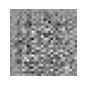

2024-06-28 07:17:42.574206: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 91, Generator Loss: 3.7573132514953613, Discriminator Loss: 0.24683715403079987


2024-06-28 07:17:49.738404: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 92, Generator Loss: 3.300907611846924, Discriminator Loss: 0.2652736008167267


2024-06-28 07:17:56.776878: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 93, Generator Loss: 2.721797466278076, Discriminator Loss: 0.1991616189479828


2024-06-28 07:18:03.931624: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 94, Generator Loss: 2.996938705444336, Discriminator Loss: 0.18273964524269104


2024-06-28 07:18:11.035845: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 95, Generator Loss: 2.6518871784210205, Discriminator Loss: 0.18790267407894135


2024-06-28 07:18:18.144014: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 96, Generator Loss: 2.9059019088745117, Discriminator Loss: 0.22479327023029327


2024-06-28 07:18:25.364014: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 97, Generator Loss: 2.6987314224243164, Discriminator Loss: 0.192711740732193


2024-06-28 07:18:32.459788: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 98, Generator Loss: 3.012516498565674, Discriminator Loss: 0.20896083116531372


2024-06-28 07:18:39.544506: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 99, Generator Loss: 2.864893913269043, Discriminator Loss: 0.19841937720775604
Epoch 100, Generator Loss: 1.6792933940887451, Discriminator Loss: 0.3061840534210205


2024-06-28 07:18:46.744150: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


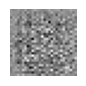

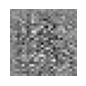

In [34]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 


# Prepare the MNIST dataset
batch_size = 256
mnist_dataset = prepare_dataset(X, batch_size)

# Train the GAN
epochs = 100

# Define the directory where images will be saved
save_directory = 'training_images_' + str(epochs) + '_epochs_time_' + str(int(time.time()))

model_save_directory = 'saved_models'
loss_save_file = 'training_losses.npz'

# Create the directories if they don't exist
if not os.path.exists(model_save_directory):
    os.makedirs(model_save_directory)
    


train(mnist_dataset, epochs, save_directory, model_save_directory, loss_save_file)


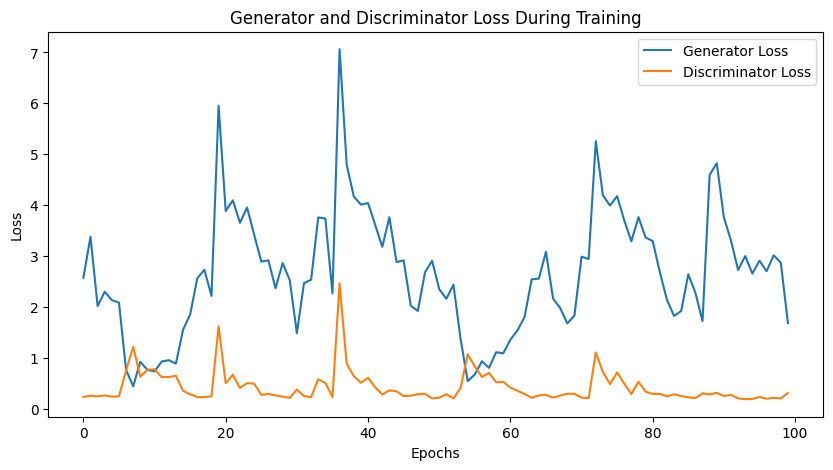

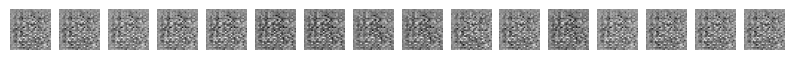

In [37]:
plot_losses(loss_save_file)

num_images_to_generate = 16

generator = keras.models.load_model('saved_models/generator_epoch_0100latent_space_size2.h5')


generate_images(generator, num_images_to_generate, latent_space_size)




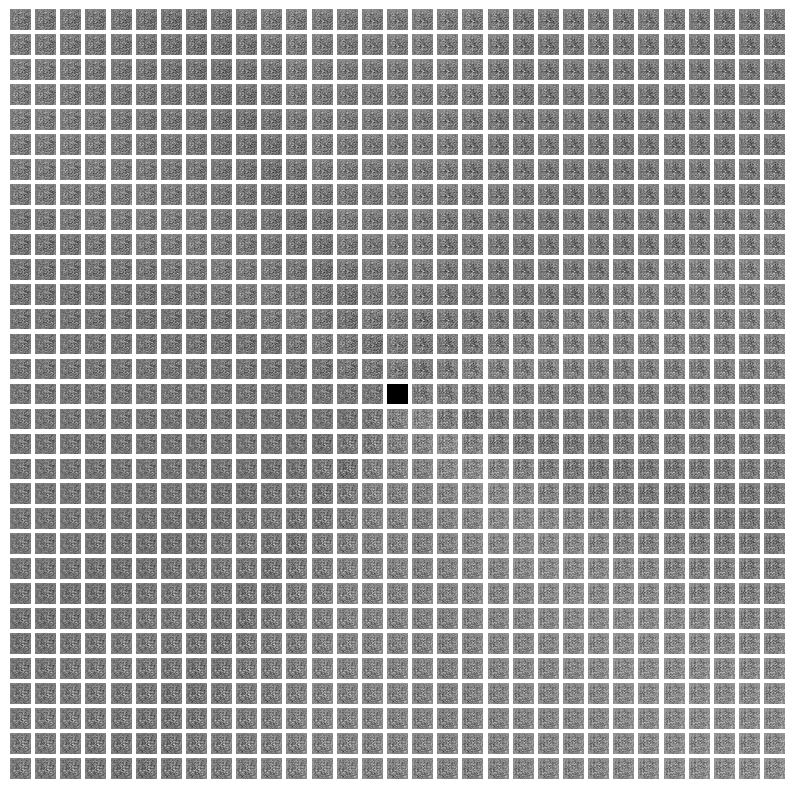

In [38]:
# Plotting the representation of the latent space
def plot_latent_space(generator_model, latent_space_size, num_points=1000):
    # Generate points in the latent space
    x = np.linspace(-1, 1, int(np.sqrt(num_points)))
    y = np.linspace(-1, 1, int(np.sqrt(num_points)))
    x, y = np.meshgrid(x, y)
    z = np.column_stack((x.flatten(), y.flatten()))

    # Generate images using the points in the latent space
    generated_images = generator_model(z, training=False)

    fig, axes = plt.subplots(int(np.sqrt(num_points)), int(np.sqrt(num_points)), figsize=(10, 10))

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(generated_images[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        ax.axis('off')

    plt.show()

plot_latent_space(generator, latent_space_size)
